In [52]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import plotly.express as px
from prophet import Prophet
plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 500)
color_pal=plt.rcParams['axes.prop_cycle'].by_key()['color']
from prophet.diagnostics import cross_validation,performance_metrics

from fredapi import Fred

In [26]:
fred_key ='f72f5a8c728effe05141d8d03abfa2a1 '

In [27]:
##Create Fred Object 
fred= Fred(api_key='f72f5a8c728effe05141d8d03abfa2a1' )

In [28]:
##Search from economic Data 
df=fred.search('Consumer Price Index of All Items in the United Kingdom')

In [29]:
df.head(7)

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
GBRCPIALLMINMEI,GBRCPIALLMINMEI,2023-04-29,2023-04-29,Consumer Price Index of All Items in the Unite...,1960-01-01,2023-02-01,Monthly,M,Index 2015=100,Index 2015=100,Not Seasonally Adjusted,NSA,2023-04-20 15:37:03-05:00,61,"Copyright, 2016, OECD. Reprinted with permissi..."
GBRCPIALLQINMEI,GBRCPIALLQINMEI,2023-04-29,2023-04-29,Consumer Price Index of All Items in the Unite...,1960-01-01,2022-10-01,Quarterly,Q,Index 2015=100,Index 2015=100,Not Seasonally Adjusted,NSA,2023-02-14 11:29:02-06:00,31,"Copyright, 2016, OECD. Reprinted with permissi..."
CPALTT01GBM659N,CPALTT01GBM659N,2023-04-29,2023-04-29,Consumer Price Index: Total All Items for the ...,1960-01-01,2023-02-01,Monthly,M,Growth rate same period previous year,Growth rate same period previous Yr.,Not Seasonally Adjusted,NSA,2023-04-20 15:37:04-05:00,43,OECD descriptor ID: CPALTT01 OECD unit ID: GY ...
CPALTT01GBQ657N,CPALTT01GBQ657N,2023-04-29,2023-04-29,Consumer Price Index: Total All Items for the ...,1960-01-01,2022-10-01,Quarterly,Q,Growth rate previous period,Growth rate previous period,Not Seasonally Adjusted,NSA,2023-02-14 11:29:02-06:00,15,OECD descriptor ID: CPALTT01 OECD unit ID: GP ...
CPALTT01GBM657N,CPALTT01GBM657N,2023-04-29,2023-04-29,Consumer Price Index: Total All Items for the ...,1960-01-01,2023-02-01,Monthly,M,Growth rate previous period,Growth rate previous period,Not Seasonally Adjusted,NSA,2023-04-20 15:37:13-05:00,3,OECD descriptor ID: CPALTT01 OECD unit ID: GP ...
CPALTT01GBQ659N,CPALTT01GBQ659N,2023-04-29,2023-04-29,Consumer Price Index: Total All Items for the ...,1960-01-01,2022-10-01,Quarterly,Q,Growth rate same period previous year,Growth rate same period previous Yr.,Not Seasonally Adjusted,NSA,2023-02-14 11:29:03-06:00,3,OECD descriptor ID: CPALTT01 OECD unit ID: GY ...
CPALTT01GBA659N,CPALTT01GBA659N,2023-04-29,2023-04-29,Consumer Price Index: Total All Items for the ...,1960-01-01,2022-01-01,Annual,A,Growth rate same period previous year,Growth rate same period previous Yr.,Not Seasonally Adjusted,NSA,2023-02-14 11:47:05-06:00,2,OECD descriptor ID: CPALTT01 OECD unit ID: GY ...


In [30]:
df.shape

(54, 15)

In [31]:
cpi=fred.get_series('GBRCPIALLMINMEI')
cpi.name='values'
cpi

1955-01-01      NaN
1955-02-01      NaN
1955-03-01      NaN
1955-04-01      NaN
1955-05-01      NaN
              ...  
2022-10-01    124.3
2022-11-01    124.8
2022-12-01    125.3
2023-01-01    124.8
2023-02-01    126.0
Name: values, Length: 818, dtype: float64

In [32]:
df=pd.DataFrame(cpi).reset_index()
df

,index,values
0,1955-01-01,NaN
1,1955-02-01,NaN
2,1955-03-01,NaN
3,1955-04-01,NaN
4,1955-05-01,NaN
...,...,...
813,2022-10-01,124.3
814,2022-11-01,124.8
815,2022-12-01,125.3
816,2023-01-01,124.8


In [33]:
df2=df[df['index']>'1989-12-01']
df2

,index,values
420,1990-01-01,52.4
421,1990-02-01,52.9
422,1990-03-01,53.1
423,1990-04-01,54.4
424,1990-05-01,55.0
...,...,...
813,2022-10-01,124.3
814,2022-11-01,124.8
815,2022-12-01,125.3
816,2023-01-01,124.8


In [11]:
fig=px.line(df2,x='index', y='values', title='CPI avg from 1990 to 2023')
fig.show()

In [34]:
###Prophet model 
##Univariate Data
##Rename Columns
df2=df2.rename(columns={'index' : 'ds', 'values':'y'})
df2

,ds,y
420,1990-01-01,52.4
421,1990-02-01,52.9
422,1990-03-01,53.1
423,1990-04-01,54.4
424,1990-05-01,55.0
...,...,...
813,2022-10-01,124.3
814,2022-11-01,124.8
815,2022-12-01,125.3
816,2023-01-01,124.8


In [35]:
model_ml=Prophet()
model_ml.fit(df2)

13:02:25 - cmdstanpy - INFO - Chain [1] start processing
13:02:31 - cmdstanpy - INFO - Chain [1] done processing


In [46]:
future=model_ml.make_future_dataframe(periods=40,freq='MS')##if weekly ='W

In [47]:
future.tail()##Now we have our future data on a montly basis 

,ds
433,2026-02-01
434,2026-03-01
435,2026-04-01
436,2026-05-01
437,2026-06-01


In [48]:
result=model_ml.predict(future)
result
###predicted value yhat. 
##Ranges =yhat lower and yhat upper 

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1990-01-01,54.169794,52.350371,55.226709,54.169794,54.169794,-0.403229,-0.403229,-0.403229,-0.403229,-0.403229,-0.403229,0.0,0.0,0.0,53.766565
1,1990-02-01,54.438855,52.702356,55.710167,54.438855,54.438855,-0.232247,-0.232247,-0.232247,-0.232247,-0.232247,-0.232247,0.0,0.0,0.0,54.206607
2,1990-03-01,54.681877,52.819429,55.849839,54.681877,54.681877,-0.363945,-0.363945,-0.363945,-0.363945,-0.363945,-0.363945,0.0,0.0,0.0,54.317932
3,1990-04-01,54.950938,53.551559,56.460100,54.950938,54.950938,0.041634,0.041634,0.041634,0.041634,0.041634,0.041634,0.0,0.0,0.0,54.992572
4,1990-05-01,55.211320,54.012264,56.946979,55.211320,55.211320,0.176369,0.176369,0.176369,0.176369,0.176369,0.176369,0.0,0.0,0.0,55.387688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,2026-02-01,127.636887,125.292426,129.428577,126.348357,128.885067,-0.232247,-0.232247,-0.232247,-0.232247,-0.232247,-0.232247,0.0,0.0,0.0,127.404640
434,2026-03-01,127.855410,125.313632,129.496674,126.480129,129.150273,-0.363945,-0.363945,-0.363945,-0.363945,-0.363945,-0.363945,0.0,0.0,0.0,127.491465
435,2026-04-01,128.097347,125.862609,130.285053,126.679148,129.427116,0.041634,0.041634,0.041634,0.041634,0.041634,0.041634,0.0,0.0,0.0,128.138981
436,2026-05-01,128.331479,126.374586,130.496480,126.869334,129.736942,0.176369,0.176369,0.176369,0.176369,0.176369,0.176369,0.0,0.0,0.0,128.507847


In [49]:
result=model_ml.predict(future)
result[{'ds','yhat', 'yhat_lower', 'yhat_upper'}]

C:\Users\brill\AppData\Local\Temp\ipykernel_13448\3534893199.py:2: FutureWarning:

Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.



,ds,yhat_lower,yhat,yhat_upper
0,1990-01-01,52.235876,53.766565,55.232991
1,1990-02-01,52.590240,54.206607,55.656305
2,1990-03-01,52.846118,54.317932,55.762077
3,1990-04-01,53.556643,54.992572,56.533681
4,1990-05-01,53.801863,55.387688,56.983973
...,...,...,...,...
433,2026-02-01,125.525938,127.404640,129.342123
434,2026-03-01,125.365070,127.491465,129.559871
435,2026-04-01,125.976091,128.138981,130.067307
436,2026-05-01,126.512179,128.507847,130.557493


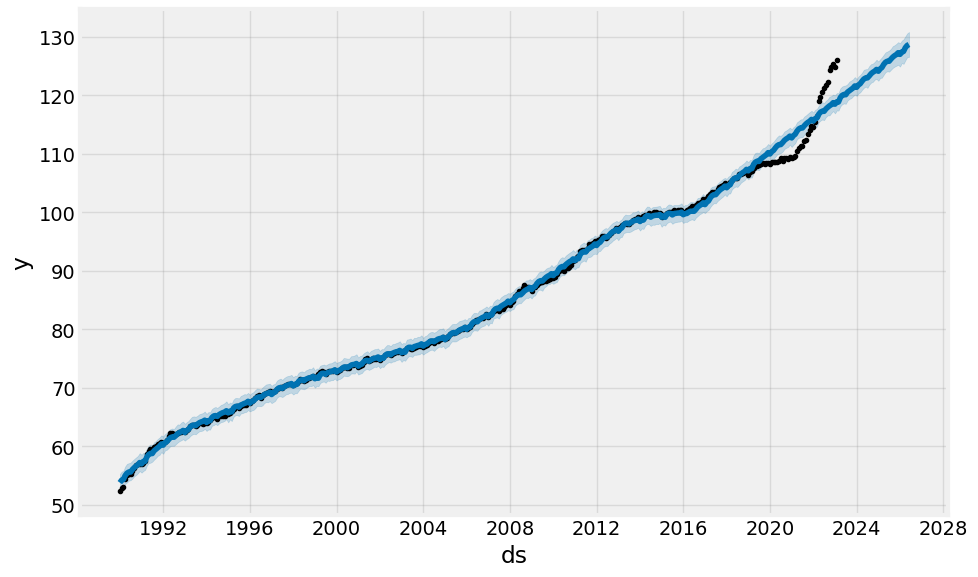

In [50]:
fig=model_ml.plot(result)
##Black line is the actual value and the blue line is the predicted value. 

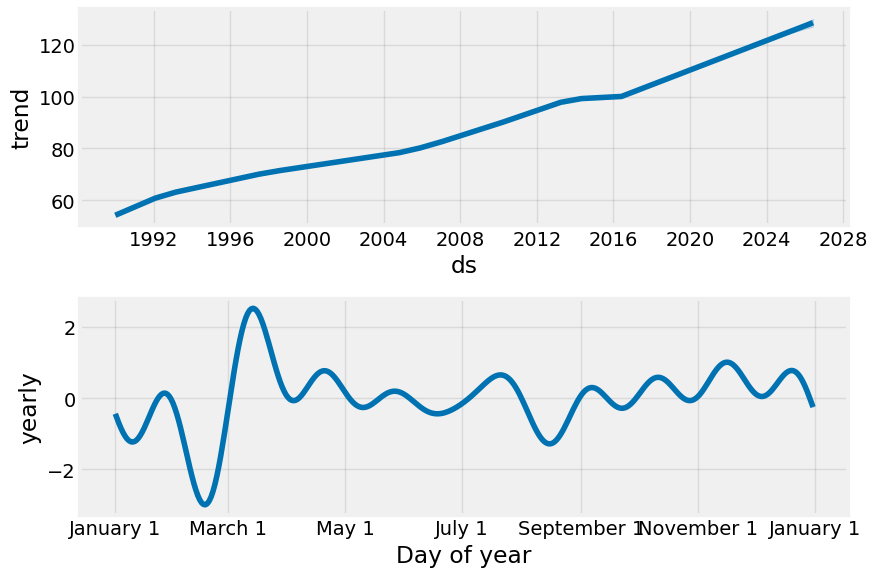

In [51]:
fig2=model_ml.plot_components(result)

In [54]:
cv_results=cross_validation(model=model_ml,initial=pd.to_timedelta(30*20,unit='D'), period=pd.to_timedelta(30*5,unit='D'),horizon=pd.to_timedelta(30*12,unit='D'))
df_p=performance_metrics(cv_results)

  0%|          | 0/75 [00:00<?, ?it/s]19:37:00 - cmdstanpy - INFO - Chain [1] start processing
19:37:10 - cmdstanpy - INFO - Chain [1] done processing
  1%|▏         | 1/75 [00:12<15:53, 12.89s/it]19:37:10 - cmdstanpy - INFO - Chain [1] start processing
19:38:03 - cmdstanpy - INFO - Chain [1] done processing
  3%|▎         | 2/75 [01:06<44:38, 36.69s/it]19:38:04 - cmdstanpy - INFO - Chain [1] start processing
19:38:58 - cmdstanpy - INFO - Chain [1] done processing
  4%|▍         | 3/75 [02:01<53:59, 44.99s/it]19:38:58 - cmdstanpy - INFO - Chain [1] start processing
19:39:57 - cmdstanpy - INFO - Chain [1] done processing
  5%|▌         | 4/75 [03:00<59:46, 50.52s/it]19:39:57 - cmdstanpy - INFO - Chain [1] start processing
19:41:00 - cmdstanpy - INFO - Chain [1] done processing
  7%|▋         | 5/75 [04:03<1:04:18, 55.12s/it]19:41:01 - cmdstanpy - INFO - Chain [1] start processing
19:41:02 - cmdstanpy - INFO - Chain [1] done processing
  8%|▊         | 6/75 [04:05<42:28, 36.93s/it]  19:4

In [55]:
df_p

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,36 days,45.733421,6.762649,1.222125,0.017253,0.003849,0.028131,0.284091
1,37 days,45.750455,6.763908,1.230660,0.017314,0.003812,0.028192,0.280303
2,38 days,45.761661,6.764737,1.238703,0.017381,0.003812,0.028260,0.272727
3,39 days,45.754656,6.764219,1.236323,0.017363,0.003785,0.028241,0.276515
4,40 days,45.740144,6.763146,1.223321,0.017234,0.003672,0.028112,0.295455
...,...,...,...,...,...,...,...,...
320,356 days,6.461191,2.541887,1.356317,0.014958,0.007893,0.015351,0.454545
321,357 days,7.214137,2.685915,1.420427,0.015370,0.007893,0.015798,0.448864
322,358 days,7.059147,2.656906,1.386802,0.015021,0.007356,0.015449,0.448864
323,359 days,6.914020,2.629452,1.355171,0.014746,0.007356,0.015172,0.450758


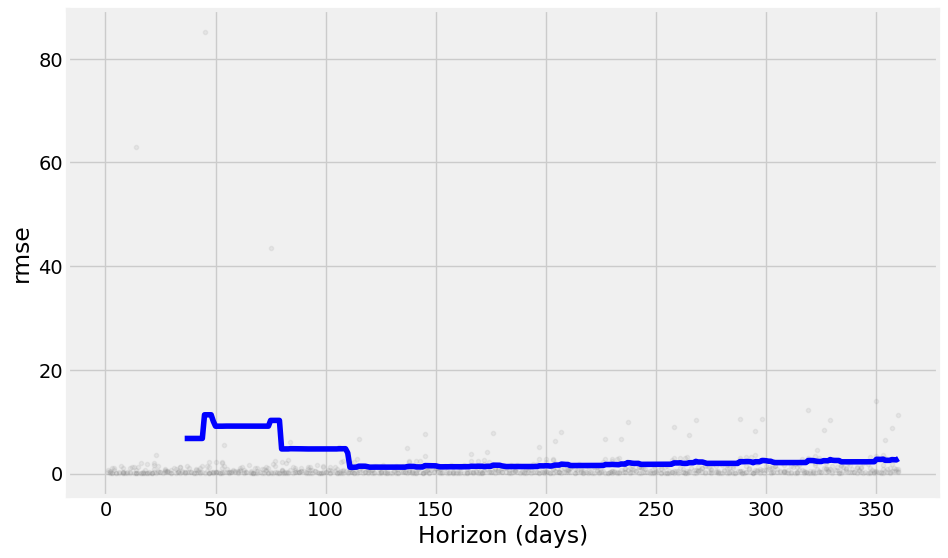

In [56]:
from prophet.plot import plot_cross_validation_metric
fig=plot_cross_validation_metric(cv_results,metric='rmse')